In [7]:
import h5py
import numpy as np

def data_loader_DATA(file_to_load):
    

    # Loads the .hdf5 file
    hf = h5py.File(file_to_load,'r')
    

    # Cria lista para armarezar as variáveis
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    X_test = []
    Y_test = []
    Classes_sort = []
    Rcr_classes = []

    # Extrai as variáveis 
    
    X_train.append(np.array(hf.get('Xtrain').get('Xtrain')))
    Y_train.append(np.array(hf.get('Ytrain').get('Ytrain')))
    X_val.append(np.array(hf.get('Xval').get('Xval')))
    Y_val.append(np.array(hf.get('Yval').get('Yval')))
    X_test.append(np.array(hf.get('Xtest').get('Xtest')))
    Y_test.append(np.array(hf.get('Ytest').get('Ytest')))
    Classes_sort.append(np.array(hf.get('Classessort').get('Classessort')))
    Rcr_classes.append(np.array(hf.get('Rcr').get('Rcr')))



    # Saves in a dictionary
    data = {    
           "X_train": X_train,
           "Y_train": Y_train,
           "X_val": X_val,
           "Y_val": Y_val,
           "X_test": X_test,
           "Y_test": Y_test,
           "Classes_sort": Classes_sort,
           "Rcr_classes": Rcr_classes
    }
    
    
    hf.close()
    return data

In [8]:
whole_data_test = []
file_to_load = 'h5/Data_extended_ballroom.hdf5'
data = data_loader_DATA(file_to_load)
whole_data_test.append(data)
print('X_train Size',whole_data_test[0]['X_train'][0].shape)
print('Y_train Size',whole_data_test[0]['Y_train'][0].shape)
print('X_val Size',whole_data_test[0]['X_val'][0].shape)
print('Y_val Size',whole_data_test[0]['Y_val'][0].shape)
print('X_test Size',whole_data_test[0]['X_test'][0].shape)
print('Y_test Size',whole_data_test[0]['Y_test'][0].shape)
print('Classes_sort Size',whole_data_test[0]['Classes_sort'][0].shape)
print('Rcr_classes',whole_data_test[0]['Rcr_classes'][0].shape)



X_train = whole_data_test[0]['X_train'][0]
Y_train = whole_data_test[0]['Y_train'][0]
X_val = whole_data_test[0]['X_val'][0]
Y_val = whole_data_test[0]['Y_val'][0]
X_test = whole_data_test[0]['X_test'][0]
Y_test = whole_data_test[0]['Y_test'][0]
Classes_sort = whole_data_test[0]['Classes_sort'][0]
Rcr_classes = whole_data_test[0]['Rcr_classes'][0]

X_train Size (3653, 17, 18, 3)
Y_train Size (3653, 85)
X_val Size (427, 17, 18, 3)
Y_val Size (427, 85)
X_test Size (100, 17, 18, 3)
Y_test Size (100, 85)
Classes_sort Size (85, 1)
Rcr_classes (85,)


In [9]:
import numpy as np
import time

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import matplotlib.image as mpimg




Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(17,18,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=85, activation="softmax"))

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
#model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['categorical_accuracy','accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 17, 18, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 9, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [13]:
epochs= 10
batch_size=32
start = time.time()
H = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))
#H = model.fit(X_train, Y_train, batch_size=32, epochs=epochs)

end = time.time()
print(f"O tempo de execução foi de aproximadamente {round((end - start)/60)} minutos")

Train on 3653 samples, validate on 427 samples
Epoch 1/10
3653/3653 [==============================] - 19s 5ms/step - loss: 2.9380 - accuracy: 0.1941 - val_loss: 2.2477 - val_accuracy: 0.4005
Epoch 2/10
3653/3653 [==============================] - 18s 5ms/step - loss: 1.9543 - accuracy: 0.4736 - val_loss: 1.7969 - val_accuracy: 0.5457
Epoch 3/10
3653/3653 [==============================] - 17s 5ms/step - loss: 1.4157 - accuracy: 0.6447 - val_loss: 1.2689 - val_accuracy: 0.6956
Epoch 4/10
3653/3653 [==============================] - 17s 5ms/step - loss: 1.1602 - accuracy: 0.6981 - val_loss: 1.1987 - val_accuracy: 0.7260
Epoch 5/10
3653/3653 [==============================] - 17s 5ms/step - loss: 0.9900 - accuracy: 0.7380 - val_loss: 1.2125 - val_accuracy: 0.7447
Epoch 6/10
3653/3653 [==============================] - 17s 5ms/step - loss: 0.8903 - accuracy: 0.7536 - val_loss: 1.0484 - val_accuracy: 0.7564
Epoch 7/10
3653/3653 [==============================] - 17s 5ms/step - loss: 0.8176

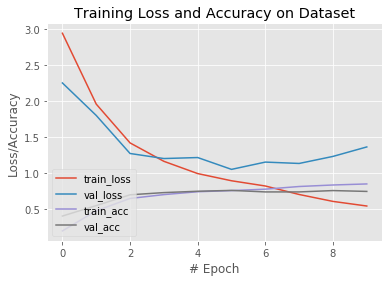

In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

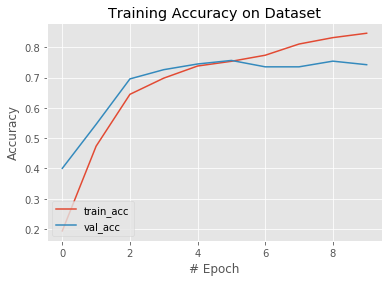

In [15]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

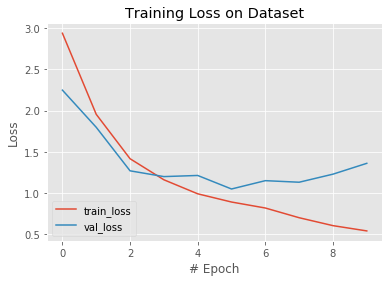

In [16]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


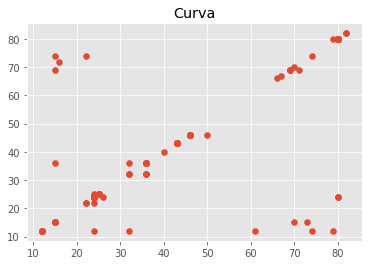

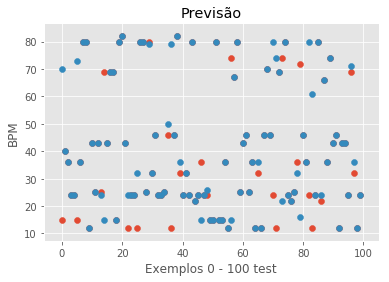

In [17]:
Auxtest = [list(range(0,len(Y_test)))]
Auxtest = np.array(Auxtest).reshape(len(Y_test))
y_predtestlist = []
y_testlist = []
y_predtest = model.predict(X_test)
for i in range (0,len(y_predtest)):
    y_predtest[i] = (y_predtest[i] == np.max(y_predtest[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtest[i][j]==1):
            y_predtestlist.append(aux)
        if (Y_test[i][j]==1):
            y_testlist.append(aux)
#y_predtest = (y_predtest > 0.5)
print(y_predtest[1])
print(Y_test[1])
plt.scatter(y_testlist,y_predtestlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtest,y_predtestlist)
plt.scatter(Auxtest,y_testlist)
plt.xlabel('Exemplos 0 - 100 test')
plt.ylabel('BPM')
plt.title('Previsão')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


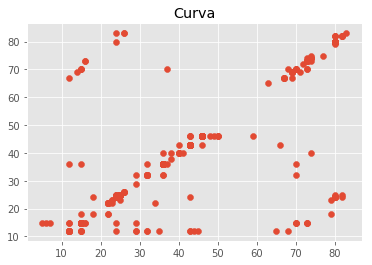

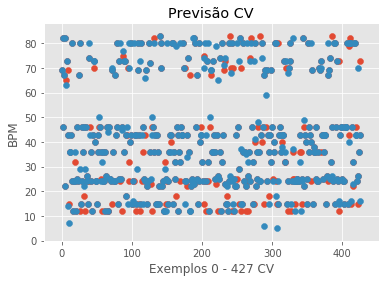

In [18]:
Auxval = [list(range(0,len(Y_val)))]
Auxval = np.array(Auxval).reshape(len(Y_val))
y_predvallist = []
y_vallist = []
y_predval = model.predict(X_val)
for i in range (0,len(y_predval)):
    y_predval[i] = (y_predval[i] == np.max(y_predval[i]))
    aux = 0
    for j in range(0,85):
        aux = aux + 1
        if (y_predval[i][j]==1):
            y_predvallist.append(aux)
        if (Y_val[i][j]==1):
            y_vallist.append(aux)
#y_predval = (y_predval > 0.5)
print(y_predval[1])
print(Y_val[1])
plt.scatter(y_vallist,y_predvallist)
plt.title('Curva')
plt.show()
plt.scatter(Auxval,y_predvallist)
plt.scatter(Auxval,y_vallist)
plt.xlabel('Exemplos 0 - 427 CV')
plt.ylabel('BPM')
plt.title('Previsão CV')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


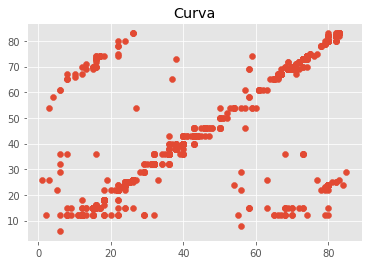

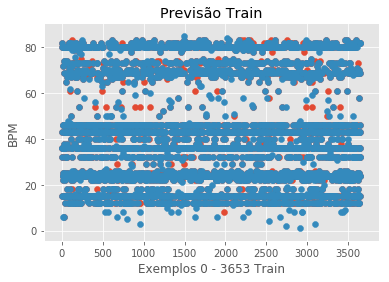

In [19]:
Auxtrain = [list(range(0,len(Y_train)))]
Auxtrain = np.array(Auxtrain).reshape(len(Y_train))
y_predtrainlist = []
y_trainlist = []
y_predtrain = model.predict(X_train)
for i in range (0,len(y_predtrain)):
    y_predtrain[i] = (y_predtrain[i] == np.max(y_predtrain[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtrain[i][j]==1):
            y_predtrainlist.append(aux)
        if (Y_train[i][j]==1):
            y_trainlist.append(aux)
#y_predtrain = (y_predtrain > 0.5)
#print(len(y_predtrain))
print(y_predtrain[1])
print(Y_train[1])
plt.scatter(y_trainlist,y_predtrainlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtrain,y_predtrainlist)
plt.scatter(Auxtrain,y_trainlist)
plt.xlabel('Exemplos 0 - 3653 Train')
plt.ylabel('BPM')
plt.title('Previsão Train')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cmval = confusion_matrix(Y_val[1], y_predval[1])
print(cmval) 

[[84  0]
 [ 0  1]]


Text(0.5,1,'Test')

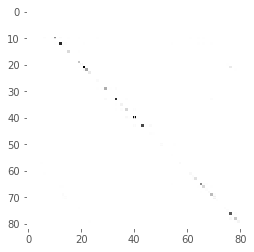

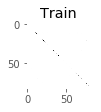

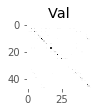

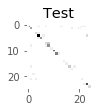

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_predval.argmax(axis=1), Y_val.argmax(axis=1))
#plt.imshow(cm, cmap='binary')

cm2 = confusion_matrix(y_predtrain.argmax(axis=1), Y_train.argmax(axis=1))
plt.imshow(cm2, cmap='binary')

cm3 = confusion_matrix(y_predtest.argmax(axis=1), Y_test.argmax(axis=1))
#plt.imshow(cm3, cmap='binary')


fig = plt.figure()
a = fig.add_subplot(3, 1, 1)
imgplot = plt.imshow(cm2, cmap='binary')
a.set_title('Train')
fig = plt.figure()
a = fig.add_subplot(3, 1, 2)
imgplot = plt.imshow(cm, cmap='binary')
a.set_title('Val')
fig = plt.figure()
a = fig.add_subplot(3, 1, 3)
imgplot = plt.imshow(cm3, cmap='binary')
a.set_title('Test')

In [22]:
a=0
for i in range(0,len(Y_val)):
    cm = confusion_matrix(Y_val[i], y_predval[i])
    if (cm[0][0]==84):
        a=a+1
b=0
for i in range(0,len(Y_train)):
    cm = confusion_matrix(Y_train[i], y_predtrain[i])
    if (cm[0][0]==84):
        b=b+1
c=0
for i in range(0,len(Y_test)):
    cm = confusion_matrix(Y_test[i], y_predtest[i])
    if (cm[0][0]==84):
        c=c+1

print(f"O conjunto de treinamento acertou {b} músicas das {len(Y_train)} do database")
print(f"O conjunto de validação acertou {a} músicas das {len(Y_val)} do database")
print(f"O conjunto de teste acertou acertou {c} músicas das {len(Y_test)} do database")

O conjunto de treinamento acertou 3281 músicas das 3653 do database
O conjunto de validação acertou 317 músicas das 427 do database
O conjunto de teste acertou acertou 76 músicas das 100 do database


In [23]:
print(f"O conjunto de treinamento tem {b*100/(len(Y_train))}% de acerto.")
print(f"O conjunto de validação tem {a*100/(len(Y_val))}% de acerto.")
print(f"O conjunto de teste tem {c*100/(len(Y_test))}% de acerto.")

O conjunto de treinamento tem 89.81658910484533% de acerto.
O conjunto de validação tem 74.23887587822014% de acerto.
O conjunto de teste tem 76.0% de acerto.
